<a href="https://colab.research.google.com/github/rishicodes01/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_EDA_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
# This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
## Explore and analyze the data to discover important factors that govern the bookings

In [42]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
#Mounting a drive
from google.colab import drive                     
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
file_path = '/content/drive/MyDrive/Hotel Bookings.csv'
df=pd.read_csv(file_path)

In [45]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [47]:
Hotel_df=df.copy()

In [48]:
Hotel_df.size

3820480

In [49]:
Hotel_df[Hotel_df.duplicated()].shape

(31994, 32)

In [50]:
Hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Cleaning data Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:

Remove duplicate rows
Handling missing values.
Convert columns to appropriate datatypes.
Adding important columns

In [51]:
# DataFrame after Drop Duplicate Rows
Hotel_df.shape

(119390, 32)

In [52]:
Hotel_df.size

3820480

In [53]:
# Handling missing values.
Hotel_df1 = Hotel_df.dropna(axis=1)

In [54]:
# Columns having missing values.
Hotel_df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [55]:
Hotel_df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [56]:
df.iloc[0:3,4:6]

,arrival_date_month,arrival_date_week_number
0,July,27
1,July,27
2,July,27


In [57]:
df_not_canceled = df[df['is_canceled'] == 0]

In [58]:
grouped_by_hotel = df.groupby('hotel')

## **Q1. From which country most of the guests are coming ?**

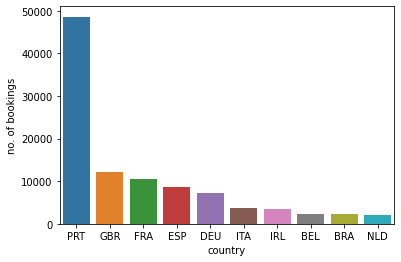

In [59]:
grp_by_country = Hotel_df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sn.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

***PRT(Portugal) is the country from most guests are coming***

## **Q2-What are the month wise bookings of each hotel? Which month is the busiest month?** 

13877
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


Text(0, 0.5, 'Number of bookings')

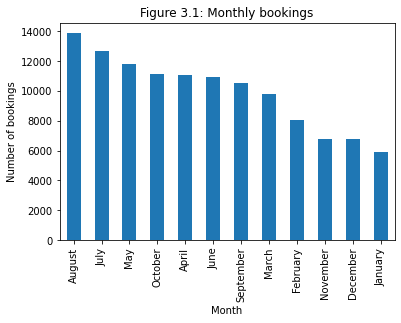

In [60]:
monthly_bookings = Hotel_df1['arrival_date_month'].value_counts()
max_monthly_bookings = Hotel_df1['arrival_date_month'].value_counts().max()

print(max_monthly_bookings)
print(monthly_bookings)
monthly_bookings.plot(kind = 'bar')
plt.title('Figure 3.1: Monthly bookings')
plt.xlabel('Month')
plt.ylabel('Number of bookings')


***August Month is the busiest one***

## **Q3. What is the most preferred meal type?**

In [61]:
meal_types_count = Hotel_df['meal'].value_counts()
# preferred_meal_type = meal_types_count.max()
# preferred_meal_type
print(meal_types_count)

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


Text(0, 0.5, 'Count')

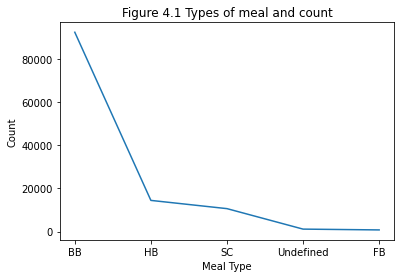

In [62]:
plt.plot(meal_types_count)
plt.title('Figure 4.1 Types of meal and count')
plt.xlabel('Meal Type')
plt.ylabel('Count')

**So as we can clearly see from this graph, among all the meals BB is the most preffered one**

## **Q4 What is preferred stay in each hotel?**

In [63]:
Hotel_df['total_stay'] = Hotel_df['stays_in_weekend_nights']+Hotel_df['stays_in_week_nights']

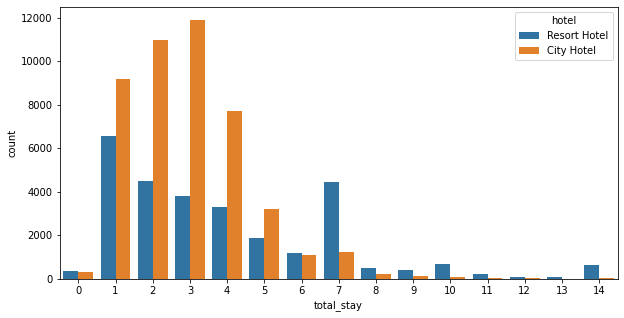

In [64]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sn.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

***Almost 30 % of City Hotel bookings got canceled.***


## ***Q5-What are the Reservations in different Hotel Type?***

Text(0.5, 1.0, '% share of different hotel type ')

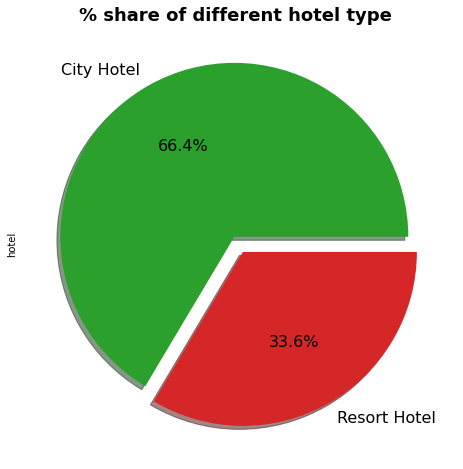

In [68]:
# Visualizing the bookings by pie chart.
ax = Hotel_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=16, colors=['tab:green', 'tab:red'])   
ax.set_title('% share of different hotel type ',fontsize = 18, fontweight='bold')
